The goal of this notebook is to explore the entire data preprocessing pipeline. We will explore different options for each step in the pipeline

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load the data
rawDF = pd.read_csv("europeanHomePurchasing.csv")

rawDF.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


Lets now explore the dataset and lets answer the following questions:

1. What are counts of different values in each column?
2. What are averages of each column?
3. What columns follow a normal distribution?
4. How many NA values are there?

In [3]:
rawDF.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


USING GROUBY()

In [4]:
# create a group that stores the count of all the values in the country column
countryGroup = rawDF.groupby("Country")

countryGroup

In [5]:
rawDF["Country"].value_counts()

Country
France     4
Spain      3
Germany    3
Name: count, dtype: int64

CREATING BAR PLOTS

Text(0.5, 1.0, 'Count of People In Each Country')

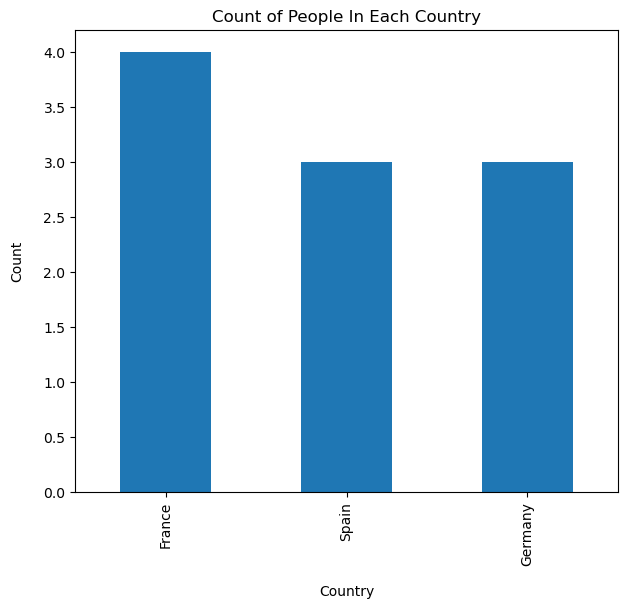

In [6]:
rawDF['Country'].value_counts().plot(kind='bar', figsize=(7, 6))
plt.xlabel("Country", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Count of People In Each Country")

Lets make a function that will make a bar chart for the value count for any column in our dataset.

In [7]:
def makeBarValueCount(aDF, colName):
    aDF[colName].value_counts().plot(kind='bar', figsize=(7, 6))
    plt.xlabel(colName, labelpad=14)
    plt.ylabel("Count", labelpad=14)
    plt.title(f"The Count in the {colName} Column")

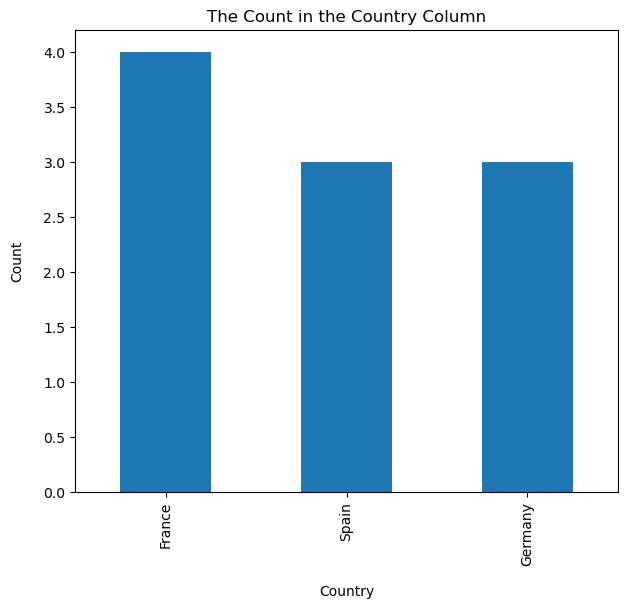

In [8]:
makeBarValueCount(rawDF, "Country")

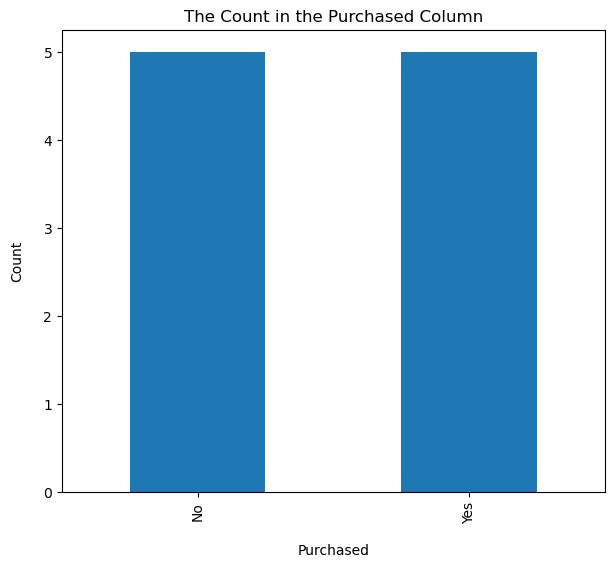

In [9]:
makeBarValueCount(rawDF, "Purchased")

In [10]:
rawDF["Age"].isna().sum()

1

In [11]:
for col in rawDF:
    naCount = rawDF[col].isna().sum()
    print(f"The number of na values in the {col} col is {naCount}")

The number of na values in the Country col is 0
The number of na values in the Age col is 1
The number of na values in the Salary col is 1
The number of na values in the Purchased col is 0


TODO: Remove na values in age and salary cols

Text(0.5, 1.0, 'Number of NA Values')

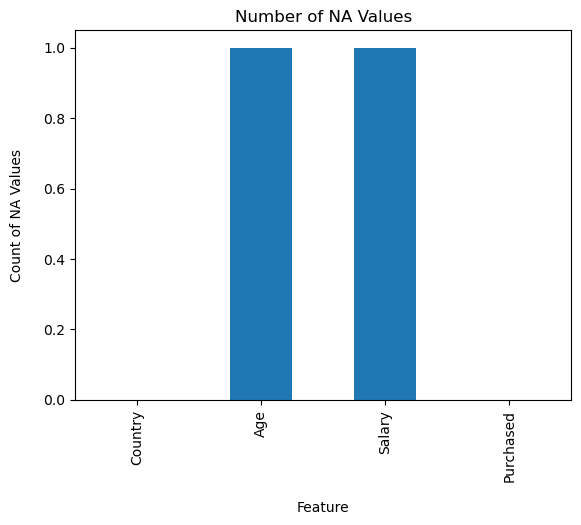

In [12]:
rawDF.isna().sum().plot(kind="bar")
plt.xlabel("Feature", labelpad=14)
plt.ylabel("Count of NA Values", labelpad=14)
plt.title(f"Number of NA Values")

(array([1., 1., 0., 1., 2., 1., 0., 1., 0., 2.]),
 array([27. , 29.3, 31.6, 33.9, 36.2, 38.5, 40.8, 43.1, 45.4, 47.7, 50. ]),
 <BarContainer object of 10 artists>)

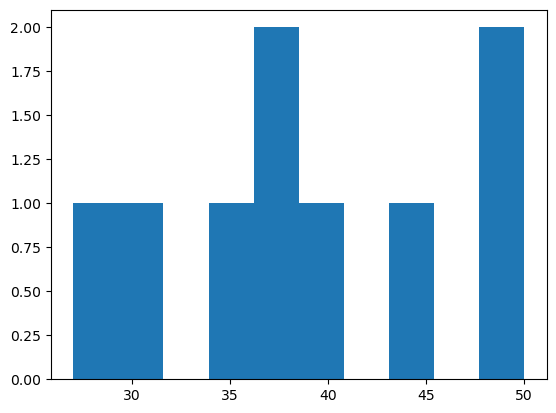

In [13]:
plt.hist(rawDF["Age"])

Lets now explore how we can handle na values

USING IMPUTATION TO REPLACE MISSING NUMERICAL VALUES

In [14]:
# Imputing missing values with the mean

from sklearn.impute import SimpleImputer

# impute a column
imputedDF = rawDF

imputer = SimpleImputer(strategy='mean')
imputedDF['Age'] = imputer.fit_transform(imputedDF['Age'].values.reshape(-1, 1) )

imputedDF['Age'].isna().sum()

0

In [15]:
imputedDF.tail()

,Country,Age,Salary,Purchased
5,France,35.000000,58000.0,Yes
6,Spain,38.777778,52000.0,No
7,France,48.000000,79000.0,Yes
8,Germany,50.000000,83000.0,No
9,France,37.000000,67000.0,Yes


In [16]:
imputedDF['Salary'] = imputer.fit_transform(imputedDF['Salary'].values.reshape(-1, 1) )

imputedDF['Salary'].isna().sum()

0

In [17]:
imputedDF.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.000000,No
1,Spain,27.0,48000.000000,Yes
2,Germany,30.0,54000.000000,No
3,Spain,38.0,61000.000000,No
4,Germany,40.0,63777.777778,Yes


USING IMPUTATION TO REPLACE MISSING CATEGORICAL VALUES

In [18]:
# INTRODUCES A NaN VALUE
'''
dict = {'Country': [np.nan], 
        'Age': [30], 
        'Salary': [60000],
        "Purchased": ["Yes"] 
       } 

newRowDF = pd.DataFrame(dict) 

imputedDF = pd.concat([imputedDF, newRowDF], ignore_index=True)
imputedDF.reset_index() 

imputedDF.tail()
'''

'\ndict = {\'Country\': [np.nan], \n        \'Age\': [30], \n        \'Salary\': [60000],\n        "Purchased": ["Yes"] \n       } \n\nnewRowDF = pd.DataFrame(dict) \n\nimputedDF = pd.concat([imputedDF, newRowDF], ignore_index=True)\nimputedDF.reset_index() \n\nimputedDF.tail()\n'

In [19]:
'''
imputerMostFrequent = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputedDF['Country'] = imputerMostFrequent.fit_transform(imputedDF['Country'].values.reshape(-1, 1) )

imputedDF.tail()
'''

"\nimputerMostFrequent = SimpleImputer(missing_values=np.nan,strategy='most_frequent')\nimputedDF['Country'] = imputerMostFrequent.fit_transform(imputedDF['Country'].values.reshape(-1, 1) )\n\nimputedDF.tail()\n"

USING LABEL ENCODER

In [20]:
# the problem is that using label encoders creates an implied order
from sklearn.preprocessing import LabelEncoder

# lets change the name of our dataframe
cleanedDF = imputedDF
# del imputedDF

#create instance of label encoder
lab = LabelEncoder()


#perform label encoding on 'team' column
cleanedDF['Country'] = lab.fit_transform(cleanedDF['Country'])

cleanedDF.tail()

,Country,Age,Salary,Purchased
5,0,35.000000,58000.0,Yes
6,2,38.777778,52000.0,No
7,0,48.000000,79000.0,Yes
8,1,50.000000,83000.0,No
9,0,37.000000,67000.0,Yes


USING ONE HOT ENCODER

In [21]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
#sparse = False puts it in format where it can be dataframe later
encoder = OneHotEncoder(sparse=False)

#perform one-hot encoding on 'Country' column 
encodedData = encoder.fit_transform(imputedDF[['Country']])

encoder.categories_

/Users/bretttracy/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array([0, 1, 2])]

In [22]:
encodedData

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [23]:
oneHotDF = pd.DataFrame(encodedData,columns=encoder.categories_)

oneHotDF.head()

,0,1,2
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


In [24]:
cleanedDF = pd.concat([imputedDF, oneHotDF], axis=1).drop(columns = "Country")

cleanedDF.head()

,Age,Salary,Purchased,"(0,)","(1,)","(2,)"
0,44.0,72000.000000,No,1.0,0.0,0.0
1,27.0,48000.000000,Yes,0.0,0.0,1.0
2,30.0,54000.000000,No,0.0,1.0,0.0
3,38.0,61000.000000,No,0.0,0.0,1.0
4,40.0,63777.777778,Yes,0.0,1.0,0.0


In [25]:
oneHotDF.columns = oneHotDF.columns.get_level_values(0)
oneHotDF.head()

,0,1,2
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


In [26]:
cleanedDF = pd.concat([imputedDF, oneHotDF], axis=1).drop(columns = "Country")

cleanedDF.head()

,Age,Salary,Purchased,0,1,2
0,44.0,72000.000000,No,1.0,0.0,0.0
1,27.0,48000.000000,Yes,0.0,0.0,1.0
2,30.0,54000.000000,No,0.0,1.0,0.0
3,38.0,61000.000000,No,0.0,0.0,1.0
4,40.0,63777.777778,Yes,0.0,1.0,0.0


MAKING A BOX PLOT

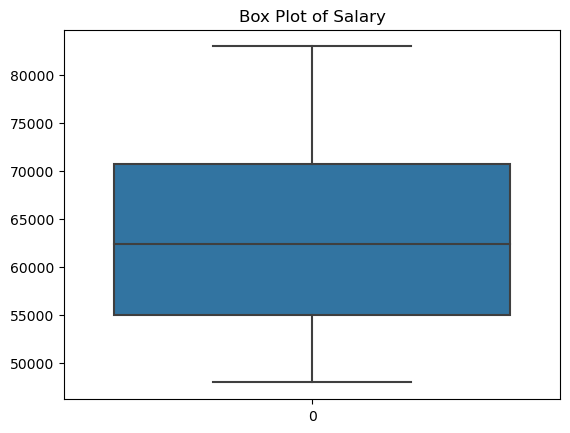

In [27]:
import seaborn as sns
sns.boxplot(cleanedDF['Salary'])
plt.title("Box Plot of Salary")
plt.show()

In [28]:
dict = {'Spain': [1.0, 0.0],
        'France': [0.0, 0.0],
        'Germany': [0.0, 1.0], 
        'Age': [30, 8], 
        'Salary': [100000, 200],
        "Purchased": ["Yes", "No"],
       }

newRowDF = pd.DataFrame(dict) 

outlierDF = pd.concat([cleanedDF, newRowDF], ignore_index=True)
outlierDF.reset_index() 

outlierDF

,Age,Salary,Purchased,0,1,2,Spain,France,Germany
0,44.000000,72000.000000,No,1.0,0.0,0.0,NaN,NaN,NaN
1,27.000000,48000.000000,Yes,0.0,0.0,1.0,NaN,NaN,NaN
2,30.000000,54000.000000,No,0.0,1.0,0.0,NaN,NaN,NaN
3,38.000000,61000.000000,No,0.0,0.0,1.0,NaN,NaN,NaN
4,40.000000,63777.777778,Yes,0.0,1.0,0.0,NaN,NaN,NaN
5,35.000000,58000.000000,Yes,1.0,0.0,0.0,NaN,NaN,NaN
6,38.777778,52000.000000,No,0.0,0.0,1.0,NaN,NaN,NaN
7,48.000000,79000.000000,Yes,1.0,0.0,0.0,NaN,NaN,NaN
8,50.000000,83000.000000,No,0.0,1.0,0.0,NaN,NaN,NaN
9,37.000000,67000.000000,Yes,1.0,0.0,0.0,NaN,NaN,NaN


In [29]:
outlierDF['Salary'].isna().sum()

0

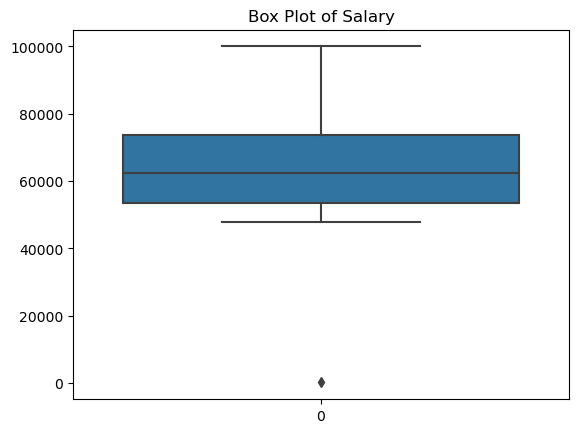

In [30]:
import seaborn as sns
sns.boxplot(outlierDF['Salary'])
plt.title("Box Plot of Salary")
plt.show()

In [31]:
maxSalary = 95000
minSalary = 20000

hardCodeRemoveDF = outlierDF

# format: df[df[column] <= threshold]

hardCodeRemoveDF = hardCodeRemoveDF[hardCodeRemoveDF["Salary"] < maxSalary]
hardCodeRemoveDF = hardCodeRemoveDF[hardCodeRemoveDF["Salary"] > minSalary]

hardCodeRemoveDF.tail()

,Age,Salary,Purchased,0,1,2,Spain,France,Germany
5,35.000000,58000.0,Yes,1.0,0.0,0.0,NaN,NaN,NaN
6,38.777778,52000.0,No,0.0,0.0,1.0,NaN,NaN,NaN
7,48.000000,79000.0,Yes,1.0,0.0,0.0,NaN,NaN,NaN
8,50.000000,83000.0,No,0.0,1.0,0.0,NaN,NaN,NaN
9,37.000000,67000.0,Yes,1.0,0.0,0.0,NaN,NaN,NaN


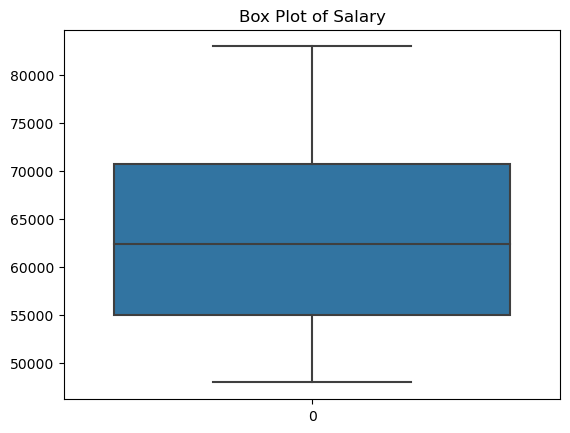

In [32]:
import seaborn as sns
sns.boxplot(hardCodeRemoveDF['Salary'])
plt.title("Box Plot of Salary")
plt.show()

REMOVING OUTLIERS USING IQR

In [33]:
# IQR definition

# NOTE: on newer version of numpy, interpolation is replaced with method:
# Q1 = np.percentile(outlierDF['Salary'], 25, method='midpoint')
# Q3 = np.percentile(outlierDF['Salary'], 75, method='midpoint')

Q1 = np.percentile(outlierDF['Salary'], 25, method='midpoint')
Q3 = np.percentile(outlierDF['Salary'], 75, method='midpoint')
IQR = Q3 - Q1

IQR

22500.0

In [34]:
maxThreshold = Q3+1.5*IQR
minThreshold = Q1-1.5*IQR

iqrDF = outlierDF[outlierDF["Salary"] < maxThreshold]
iqrDF = iqrDF[iqrDF["Salary"] > minThreshold]

iqrDF.tail()

,Age,Salary,Purchased,0,1,2,Spain,France,Germany
6,38.777778,52000.0,No,0.0,0.0,1.0,NaN,NaN,NaN
7,48.000000,79000.0,Yes,1.0,0.0,0.0,NaN,NaN,NaN
8,50.000000,83000.0,No,0.0,1.0,0.0,NaN,NaN,NaN
9,37.000000,67000.0,Yes,1.0,0.0,0.0,NaN,NaN,NaN
10,30.000000,100000.0,Yes,NaN,NaN,NaN,1.0,0.0,0.0


REMOVING OUTLIERS USING Z-SCORE

In [35]:
from scipy import stats
z = np.abs(stats.zscore(outlierDF['Salary']))
print(z)

0     0.451392
1     0.580180
2     0.322287
3     0.021411
4     0.097983
5     0.150358
6     0.408251
7     0.752268
8     0.924196
9     0.236482
10    1.654893
11    2.634728
Name: Salary, dtype: float64


In [36]:
# lets set a threshold

zThreshold = 2
 
outlierIndices = np.where(z > zThreshold)[0]
zOutlierDF = outlierDF.drop(outlierIndices)
print("Original DataFrame Shape:", outlierDF.shape)
print("DataFrame Shape after Removing Outliers:", zOutlierDF.shape)

zOutlierDF.tail()

Original DataFrame Shape: (12, 9)
DataFrame Shape after Removing Outliers: (11, 9)


,Age,Salary,Purchased,0,1,2,Spain,France,Germany
6,38.777778,52000.0,No,0.0,0.0,1.0,NaN,NaN,NaN
7,48.000000,79000.0,Yes,1.0,0.0,0.0,NaN,NaN,NaN
8,50.000000,83000.0,No,0.0,1.0,0.0,NaN,NaN,NaN
9,37.000000,67000.0,Yes,1.0,0.0,0.0,NaN,NaN,NaN
10,30.000000,100000.0,Yes,NaN,NaN,NaN,1.0,0.0,0.0


FEATURE SCALING

There are two common methods used for feature scaling.
1. Normalization
    - Range between 0 and 1 (0 = minimum, 1 = maximum)
    - Uses min-max scaling
    - Normalization does not make the distribution normal
2. Standardization
    - Mean of the data is 0
    - Standard deviation is 1
    - Min and Max can be any number
    - Allows for negative values
    - Pro is you can initialize nueral networks better since there will already be negative values
    - Con is it is best to use standardization if your data is already normally distributed

Rule of Thumb: If your data is normally distributed then use standardization, if it is not then use normalization

In [37]:
# normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# initialize the DF
normalizedDF = iqrDF

normalizedDF[["Salary", "Age"]] = scaler.fit_transform(iqrDF[["Salary", "Age"]])

normalizedDF.head()

,Age,Salary,Purchased,0,1,2,Spain,France,Germany
0,0.739130,0.461538,No,1.0,0.0,0.0,NaN,NaN,NaN
1,0.000000,0.000000,Yes,0.0,0.0,1.0,NaN,NaN,NaN
2,0.130435,0.115385,No,0.0,1.0,0.0,NaN,NaN,NaN
3,0.478261,0.250000,No,0.0,0.0,1.0,NaN,NaN,NaN
4,0.565217,0.303419,Yes,0.0,1.0,0.0,NaN,NaN,NaN


In [38]:
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# initialize the DF
StandardizedDF = iqrDF

StandardizedDF[["Salary", "Age"]] = scaler.fit_transform(iqrDF[["Salary", "Age"]])

StandardizedDF.head()

,Age,Salary,Purchased,0,1,2,Spain,France,Germany
0,0.856382,0.333970,No,1.0,0.0,0.0,NaN,NaN,NaN
1,-1.561891,-1.292082,Yes,0.0,0.0,1.0,NaN,NaN,NaN
2,-1.135137,-0.885569,No,0.0,1.0,0.0,NaN,NaN,NaN
3,0.002874,-0.411304,No,0.0,0.0,1.0,NaN,NaN,NaN
4,0.287376,-0.223103,Yes,0.0,1.0,0.0,NaN,NaN,NaN
